In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
from sklearn.model_selection import train_test_split
torch.set_default_dtype(torch.float64)

In [5]:
def create_balanced_batches(x, y,w, batch_size = None):
    x = torch.tensor(x)
    y = torch.tensor(y)
    w = torch.tensor(w)
    unique_classes = dfy.unique()
    batches = torch.tensor([])
    for cls in unique_classes:
        cls_indices = dfy[dfy == cls].nonzero()
        cls_dfx = x[cls_indices]
        cls_dfy = y[cls_indices]
        cls_dfw = w[cls_indices]
        cls_data = list(zip(cls_dfx, cls_dfy, cls_dfw))
        np.random.shuffle(cls_data)
        cls_batches = torch.tensor([cls_data[i:i + batch_size // len(unique_classes)] for i in range(0, len(cls_data), batch_size // len(unique_classes))])
        torch.cat([batches,cls_batches])
    np.random.shuffle(batches)
    return batches

In [11]:
x = X_train
y = y_train
w = w_train

In [17]:
x = torch.tensor(np.array(x))
y = torch.tensor(np.array(y),dtype = torch.float32)
w = torch.tensor(np.array(w))
batches = torch.tensor([])

TypeError: only integer tensors of a single element can be converted to an index

In [ ]:
batchsize=1000
def get_balanced_batch(x,y,w,bathchsize)
    batch = []
    dim = y.size()[1]
    size = y.size()[0]
    num  = size // batchsize
    for i in range(dim):
        filted = x.T*y.T[i]
        msk = (filted).mean(dim=0)!=0
        btx = filted[:,msk.view(-1)].T
        filted = y.T*y.T[i]
        msk = (filted).mean(dim=0)!=0
        bty = filted[:,msk.view(-1)].T
        filted = w.T*y.T[i]
        msk = filted!=0
        btw = (filted[msk.view(-1)].T).view(-1,1)
        bt = [btx,bty,btw]
        batch.append(bt)

    batches = []
    for n in range(num):
        id = n*batchsize
        x_b=torch.tensor([])
        y_b=torch.tensor([])
        w_b=torch.tensor([])
        for i in range(dim):
            x_b= torch.cat([x_b,batch[i][0][id:id+batchsize]])
            y_b= torch.cat([y_b,batch[i][1][id:id+batchsize]])
            w_b= torch.cat([w_b,batch[i][2][id:id+batchsize]])
        batches.append([x_b,y_b,w_b])
    return batches
        


SyntaxError: expected ':' (1762461581.py, line 2)

In [302]:
(y.sum(dim=0)/y.sum()*batchsize).item()

RuntimeError: a Tensor with 7 elements cannot be converted to Scalar

In [280]:
for BX,BY,BW in batches[:10]:
    print(BY.size())

torch.Size([7000, 7])
torch.Size([7000, 7])
torch.Size([7000, 7])
torch.Size([7000, 7])
torch.Size([7000, 7])
torch.Size([7000, 7])
torch.Size([7000, 7])
torch.Size([7000, 7])
torch.Size([7000, 7])
torch.Size([7000, 7])


In [258]:
batch[0][0][0:1000]

tensor([[9.4112e-02, 8.6659e-01, 3.6283e-02,  ..., 9.4449e-04, 3.9948e-05,
         9.1545e-04],
        [1.9582e-01, 1.5962e-01, 2.6510e-01,  ..., 7.2050e-04, 4.1710e-02,
         3.3465e-01],
        [5.5543e-02, 8.9861e-01, 4.3566e-02,  ..., 8.8505e-04, 2.7090e-05,
         5.6236e-04],
        ...,
        [2.3576e-01, 5.5713e-02, 4.7241e-01,  ..., 1.0165e-03, 2.3923e-03,
         2.2994e-01],
        [2.9131e-02, 4.2706e-01, 4.9737e-01,  ..., 1.6510e-03, 3.5151e-04,
         4.2112e-02],
        [1.9602e-01, 2.3108e-01, 3.1793e-01,  ..., 1.7122e-03, 4.9433e-03,
         2.4585e-01]], dtype=torch.float32)

In [198]:
xy = torch.cat([btx,bty])
xy.view(2,-1,7)

tensor([[[4.8447e-02, 1.1093e-02, 4.7640e-02,  ..., 7.3550e-04,
          4.0461e-01, 4.8260e-01],
         [5.3815e-04, 8.7645e-04, 3.2505e-03,  ..., 2.0515e-05,
          1.4548e-01, 8.4982e-01],
         [5.6603e-03, 8.4991e-03, 9.2135e-03,  ..., 7.8373e-03,
          1.2666e-01, 8.1915e-01],
         ...,
         [7.1522e-06, 6.5898e-06, 1.0951e-05,  ..., 9.0639e-05,
          5.1322e-03, 9.9447e-01],
         [1.6767e-03, 4.3159e-03, 1.2776e-02,  ..., 6.7657e-05,
          1.8397e-02, 9.6270e-01],
         [9.6690e-03, 1.8396e-01, 1.0170e-01,  ..., 4.4483e-04,
          2.0049e-03, 7.0087e-01]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 1.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 1.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 1.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.000

In [197]:
btx

tensor([[4.8447e-02, 1.1093e-02, 4.7640e-02,  ..., 7.3550e-04, 4.0461e-01,
         4.8260e-01],
        [5.3815e-04, 8.7645e-04, 3.2505e-03,  ..., 2.0515e-05, 1.4548e-01,
         8.4982e-01],
        [5.6603e-03, 8.4991e-03, 9.2135e-03,  ..., 7.8373e-03, 1.2666e-01,
         8.1915e-01],
        ...,
        [7.1522e-06, 6.5898e-06, 1.0951e-05,  ..., 9.0639e-05, 5.1322e-03,
         9.9447e-01],
        [1.6767e-03, 4.3159e-03, 1.2776e-02,  ..., 6.7657e-05, 1.8397e-02,
         9.6270e-01],
        [9.6690e-03, 1.8396e-01, 1.0170e-01,  ..., 4.4483e-04, 2.0049e-03,
         7.0087e-01]], dtype=torch.float32)

In [ ]:
M = torch.einsum('kn,nm->knm', y.T, x)

ValueError: only one element tensors can be converted to Python scalars

In [ ]:
for cls in unique_classes:
    cls_indices = dfy[dfy == cls].nonzero()
    cls_dfx = x[cls_indices]
    cls_dfy = y[cls_indices]
    cls_dfw = w[cls_indices]
    cls_data = list(zip(cls_dfx, cls_dfy, cls_dfw))
    np.random.shuffle(cls_data)
    cls_batches = torch.tensor([cls_data[i:i + batch_size // len(unique_classes)] for i in range(0, len(cls_data), batch_size // len(unique_classes))])
    torch.cat([batches,cls_batches])
np.random.shuffle(batches)

In [7]:

# filecode = 'x10x40'
filecode = 'InfA_xgb_AJF'
savecode = 'x14x2'
train_hp = {
    "lr":3e-5,
    "batch_size":1000,
    "N_epochs":400,
    "seed":0,

}

oc = np.load(f'/vols/cms/hw423/Data/Week14/octest_{filecode}.npy')
df = pd.DataFrame(oc)
dfx = df

label = pd.read_pickle('/vols/cms/hw423/Data/Week14/Label.pkl')
dfy = pd.get_dummies(label)
dfw = pd.read_pickle('/vols/cms/hw423/Data/Week14/weight.pkl')



X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(dfx, dfy,dfw, test_size=0.2, random_state=42)


In [22]:

# optimiser = torch.optim.SGD(model.parameters(), lr=0.01)
X_train =X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
w_train = w_train.to_numpy()
w_test = w_test.to_numpy()

train_loss, test_loss = [], []
mu_ini = torch.ones(6)
ia_loss = lambda x,y,w,m: InfAwareLoss(x,y,w,m,mu_ini)

In [23]:
batch_gen = create_balanced_batches(X_train, y_train, w_train, batch_size = train_hp['batch_size'])
# for batch in batch_gen:
#     batch = torch.tensor(np.array(batch)).T
#     print(batch.size())
#     X_tensor, y_tensor, w_tensor = batch


KeyboardInterrupt: 

In [16]:
torch.tensor(batch_gen)

ValueError: only one element tensors can be converted to Python scalars

In [3]:
df_sample = df.sample(n=1000)

In [8]:
df_sample['subleadPhotonSigmaE']

41187      1.926653
2794036   -0.574445
2442116    0.632852
2458252   -0.352543
274446    -0.491701
             ...   
870664    -0.533073
2748466   -0.164490
1653439   -0.469135
2130389   -0.668471
894239     1.024001
Name: subleadPhotonSigmaE, Length: 1000, dtype: float32

(array([578., 228., 106.,  51.,  19.,   8.,   4.,   3.,   2.,   1.]),
 array([-1.00466573, -0.18641947,  0.63182676,  1.450073  ,  2.26831937,
         3.08656549,  3.90481186,  4.72305822,  5.54130411,  6.35955048,
         7.17779684]),
 <BarContainer object of 10 artists>)

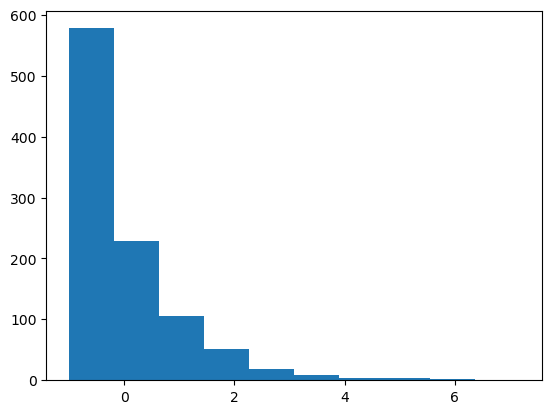

In [17]:
plt.hist(df_sample['subleadPhotonEn'])